In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [44]:
# Importing the dataset
df = pd.read_csv(r"C:\Users\ebello\OneDrive - United Against Poverty\Desktop\D.A.P\AAPL.csv")
print(df.head())


       Date       Open       High        Low      Close  Adj Close     Volume
0  4/3/2019  48.312500  49.125000  48.287498  48.837502  47.015808   93087200
1  4/4/2019  48.697498  49.092499  48.285000  48.922501  47.097652   76457200
2  4/5/2019  49.112499  49.275002  48.982498  49.250000  47.412918   74106400
3  4/8/2019  49.105000  50.057499  49.084999  50.025002  48.159012  103526800
4  4/9/2019  50.080002  50.712502  49.807499  49.875000  48.014595  143072800


In [45]:
print(df.shape)

(1259, 7)


In [46]:
print(df.describe())

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    129.892651   131.355890   128.529591   130.015661   128.477407   
std      44.322779    44.668505    43.959713    44.329651    44.657698   
min      43.860001    44.480000    42.567501    43.325001    41.869549   
25%      91.265000    92.793751    90.738751    91.421249    89.404477   
50%     141.580002   143.320007   139.360001   141.860001   140.166214   
75%     166.415001   168.360001   164.974998   166.229996   164.715789   
max     198.020004   199.619995   197.000000   198.110001   197.857529   

             Volume  
count  1.259000e+03  
mean   9.825104e+07  
std    5.198243e+07  
min    2.404830e+07  
25%    6.484330e+07  
50%    8.492380e+07  
75%    1.151522e+08  
max    4.265100e+08  


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB
None


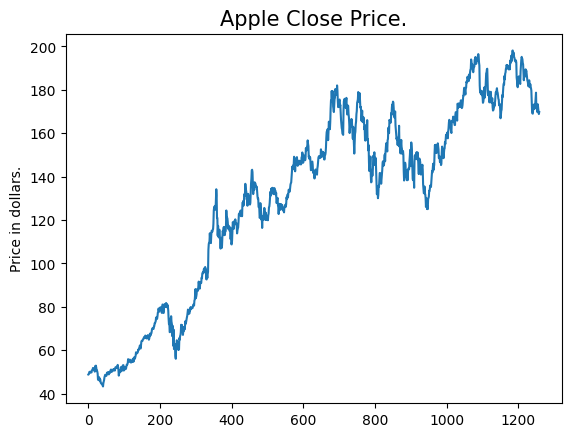

In [48]:
# Exploratory Data Analysis
plt.figure(figure=(15,5))
plt.plot(df['Close'])
plt.title('Apple Close Price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [49]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,4/3/2019,48.312500,49.125000,48.287498,48.837502,47.015808,93087200
1,4/4/2019,48.697498,49.092499,48.285000,48.922501,47.097652,76457200
2,4/5/2019,49.112499,49.275002,48.982498,49.250000,47.412918,74106400
3,4/8/2019,49.105000,50.057499,49.084999,50.025002,48.159012,103526800
4,4/9/2019,50.080002,50.712502,49.807499,49.875000,48.014595,143072800


In [50]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

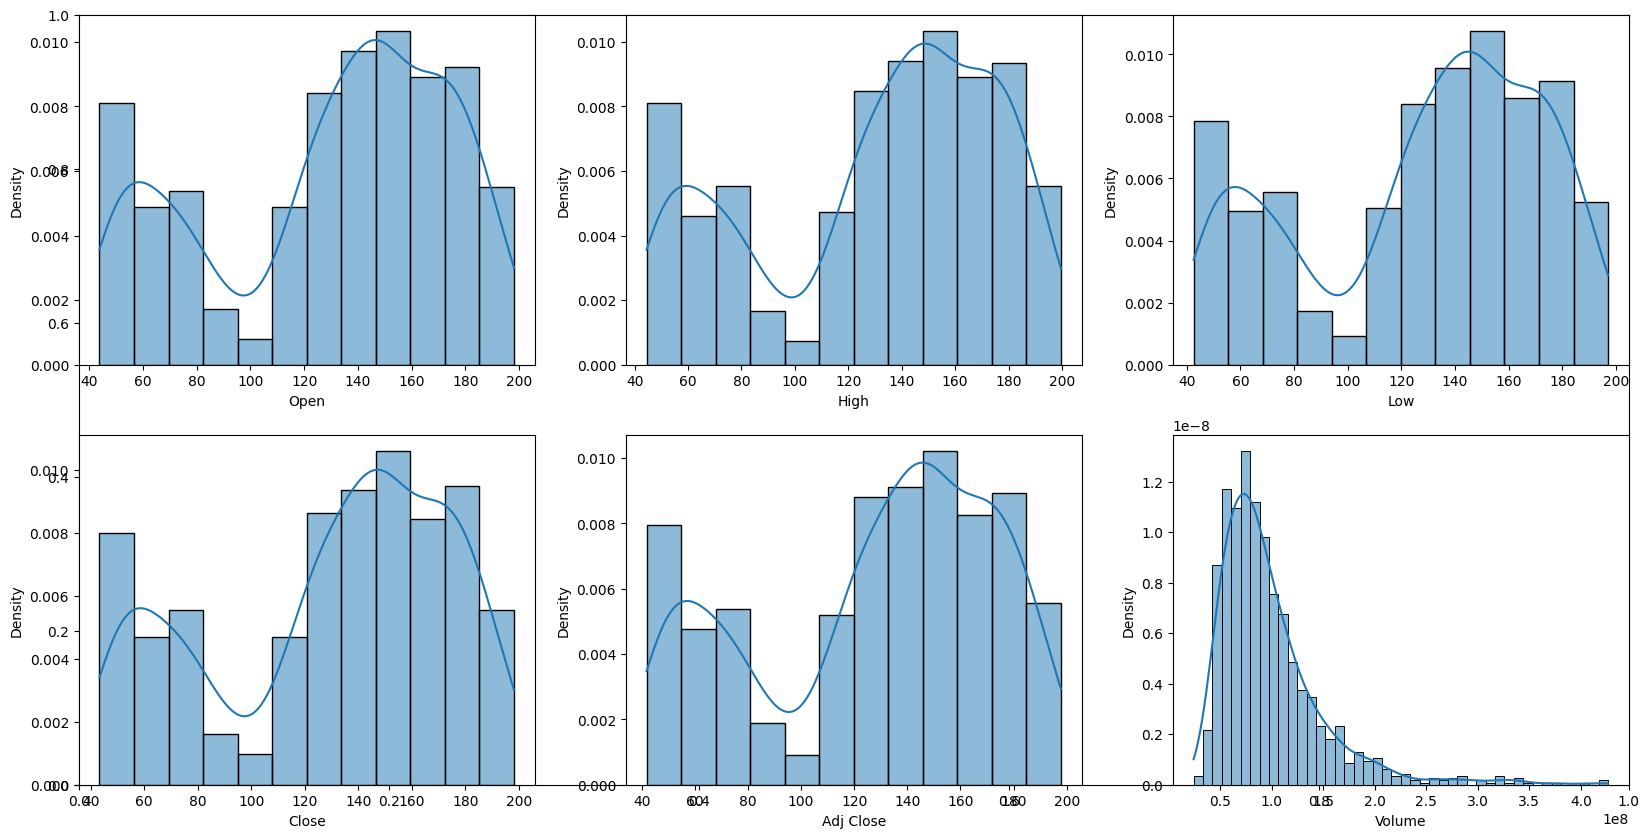

In [51]:
# Distribution Plot
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.histplot(df[col], kde=True, stat='density')
plt.show()

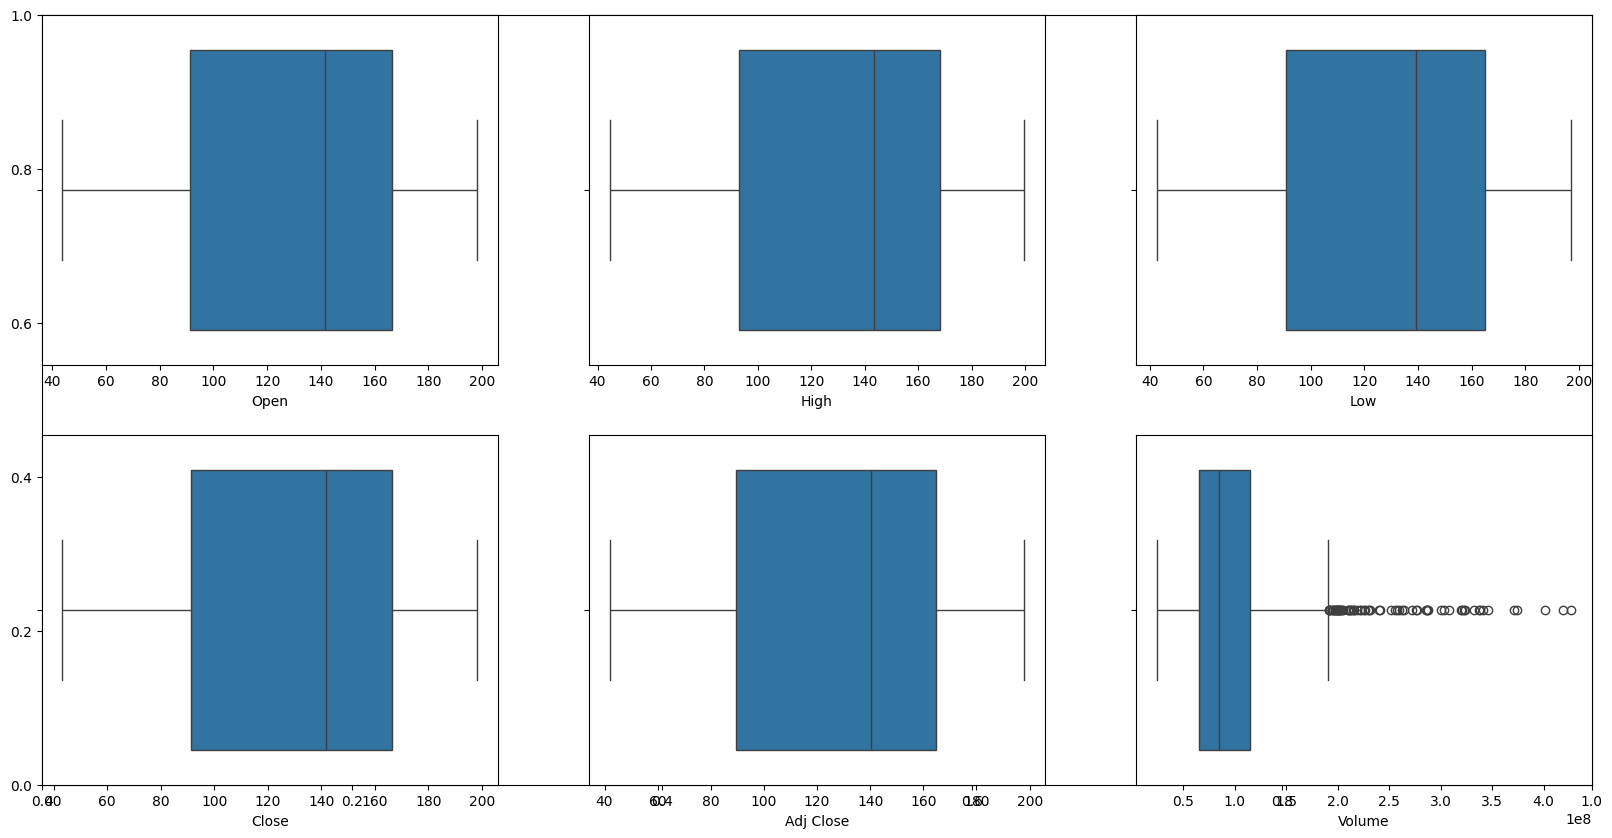

In [52]:
# Boxplot
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3, i+1)
  sb.boxplot(df[col], orient='h')
plt.show()

In [53]:
# Feature Engineering
splitted = df['Date'].str.split('/' , expand=True)

df['day'] = splitted[1].astype('int')
df['month'] = splitted[0].astype('int')
df['year'] = splitted[2].astype('int')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,4/3/2019,48.312500,49.125000,48.287498,48.837502,47.015808,93087200,3,4,2019
1,4/4/2019,48.697498,49.092499,48.285000,48.922501,47.097652,76457200,4,4,2019
2,4/5/2019,49.112499,49.275002,48.982498,49.250000,47.412918,74106400,5,4,2019
3,4/8/2019,49.105000,50.057499,49.084999,50.025002,48.159012,103526800,8,4,2019
4,4/9/2019,50.080002,50.712502,49.807499,49.875000,48.014595,143072800,9,4,2019


In [54]:
# Quarter end
df['is_quarter_end'] = np.where(df['month']%3==0, 1, 0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,4/3/2019,48.312500,49.125000,48.287498,48.837502,47.015808,93087200,3,4,2019,0
1,4/4/2019,48.697498,49.092499,48.285000,48.922501,47.097652,76457200,4,4,2019,0
2,4/5/2019,49.112499,49.275002,48.982498,49.250000,47.412918,74106400,5,4,2019,0
3,4/8/2019,49.105000,50.057499,49.084999,50.025002,48.159012,103526800,8,4,2019,0
4,4/9/2019,50.080002,50.712502,49.807499,49.875000,48.014595,143072800,9,4,2019,0


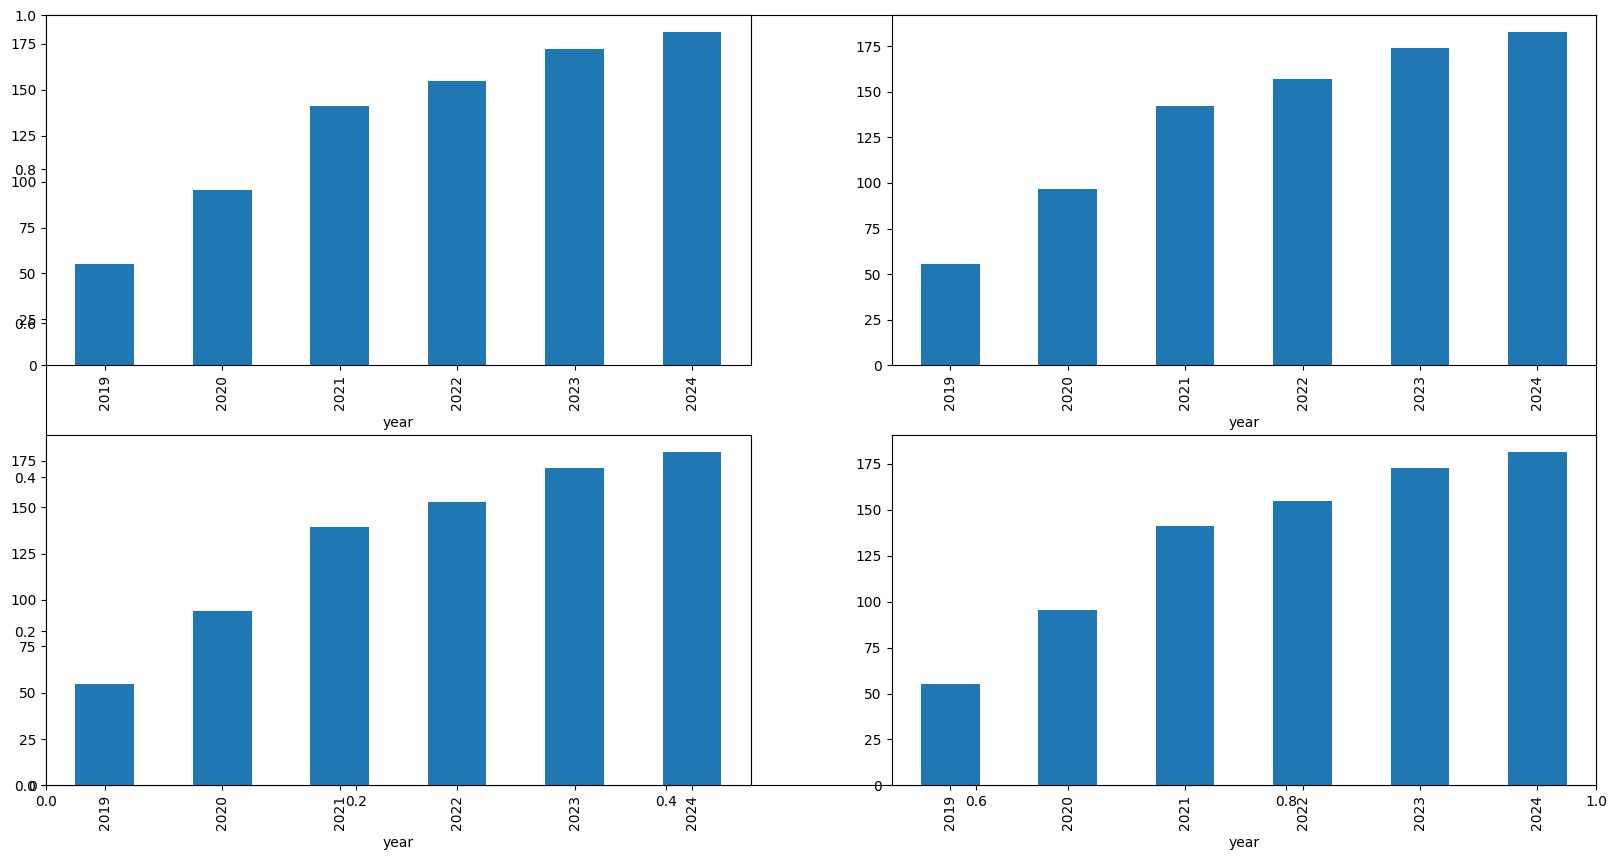

In [55]:
data_grouped = df.groupby('year').mean(numeric_only=True)
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2, i+1)
  data_grouped[col].plot.bar()
plt.show()


In [56]:
df.groupby('is_quarter_end').mean(numeric_only=True)

,Open,High,Low,Close,Adj Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,129.306975,130.747746,128.026008,129.489016,127.925124,9.424581e+07,15.692677,6.093637,2021.248499
1,131.037882,132.545053,129.514296,131.045464,129.557339,1.060829e+08,15.746479,7.436620,2021.246479


In [57]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

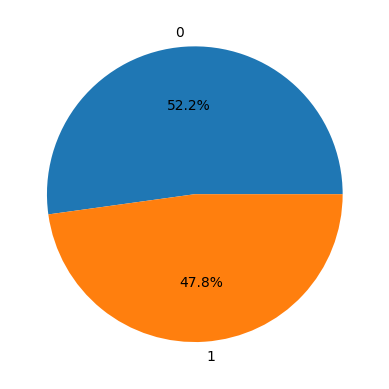

In [58]:
# Pie Chart
plt.pie(df['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()

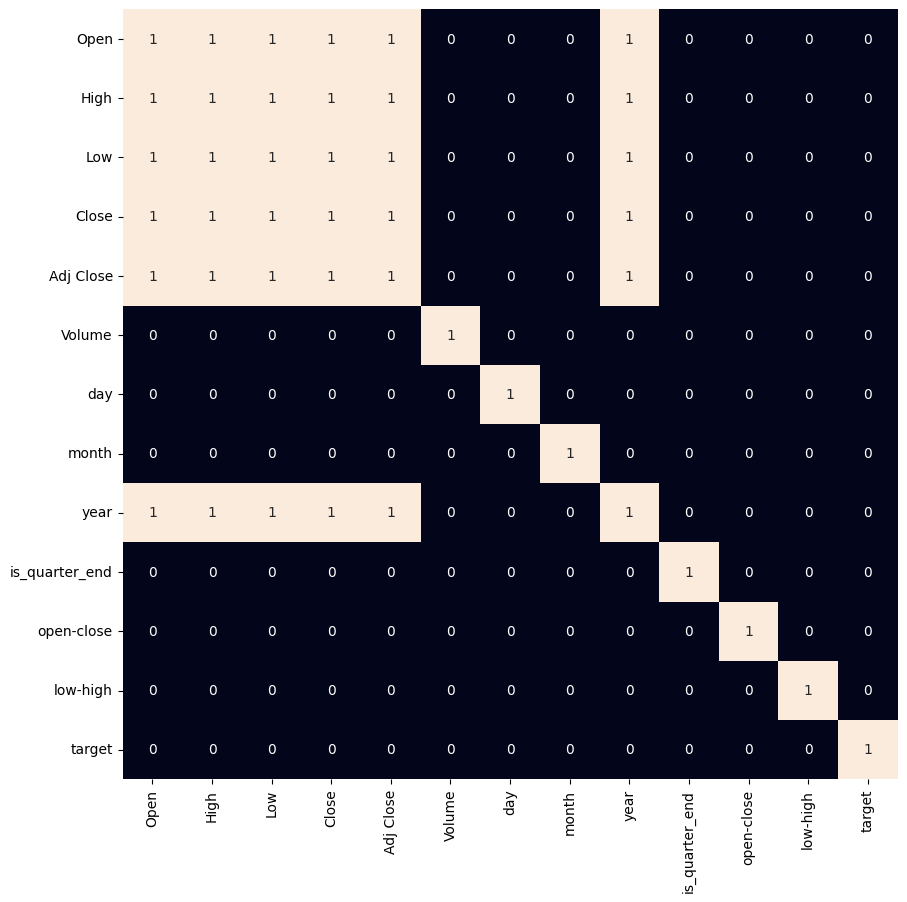

In [59]:
# Heatmap 
plt.figure(figsize=(10,10))
sb.heatmap(df.corr(numeric_only=True) > 0.9, annot=True, cbar=False)
plt.show()

In [60]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(1133, 3) (126, 3)


In [61]:
models =[LogisticRegression(), SVC(
    kernel='poly', probability=True), XGBClassifier()]

for i in range(3): 
  models[i].fit(X_train, Y_train) 
  
  print(f'{models[i]} : ') 
  print('Training Accuracy : ', metrics.roc_auc_score( 
    Y_train, models[i].predict_proba(X_train)[:,1])) 
  print('Validation Accuracy : ', metrics.roc_auc_score( 
    Y_valid, models[i].predict_proba(X_valid)[:,1])) 
  print()

LogisticRegression() : 
Training Accuracy :  0.5189833151411196
Validation Accuracy :  0.5608108108108107

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.4557586153126462
Validation Accuracy :  0.45218295218295224

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training

In [62]:
metrics.confusion_matrix(models[0], X_valid, Y_valid) 
plt.show()

TypeError: too many positional arguments